# Train e Test del Modello

## Import delle librerie

Per prima cosa procediamo con l'importazione delle librerie necessarie al corretto funzionamento dell'addestramento.

In [1]:
!pip install --user -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

## Caricamento dei dataset

Ora procediamo con il caricamento dei dataset creati nel primo file di questo progetto.

In [3]:
url_train = 'train.csv'
url_test = 'test.csv'

train_data = pd.read_csv(url_train)
test_data =pd.read_csv(url_test)

Verifichiamo che i dataset siano stati importati in modo corretto.

In [4]:
if train_data.empty or test_data.empty:
    raise("I dataset non sono stati caricati correttamente.")

## Rimozione delle righe con valori nulli

Procediamo ora con il cercare se ci sono righe nulle sia sul dataset di train che su quello di test. Tali righe saranno considerate non valide e dovranno, pertanto, essere rimosse dal dataset per evitare possibili errori durante l'addestramento.

I simboli che in genere vengono utilizzati per intendere le righe nulle sono: "", " ", "_", "-", "?", "nan", "na", "NaN".

Come prima operazione ceschiamo di trovare i valori nulli nei vari dataset:

In [5]:
# Sostituisco ad ogni stringa vuola il valore 'NaN' nel dataset di train
train_data.replace("", np.nan, inplace=True)
train_data.replace(" ", np.nan, inplace=True)
train_data.replace("_", np.nan, inplace=True)
train_data.replace("-", np.nan, inplace=True)
train_data.replace("?", np.nan, inplace=True)
train_data.replace("nan", np.nan, inplace=True)
train_data.replace("na", np.nan, inplace=True)
train_data.replace("NaN", np.nan, inplace=True)

# Sostituisco ad ogni stringa vuola il valore 'NaN' nel dataset di test
test_data.replace("", np.nan, inplace=True)
test_data.replace(" ", np.nan, inplace=True)
test_data.replace("_", np.nan, inplace=True)
test_data.replace("-", np.nan, inplace=True)
test_data.replace("?", np.nan, inplace=True)
test_data.replace("nan", np.nan, inplace=True)
test_data.replace("na", np.nan, inplace=True)
test_data.replace("NaN", np.nan, inplace=True)

In [6]:
# Controllo dei dati non validi (NaN) nel dataset di train
train_data.isna().sum()

DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [7]:
# Controllo dei dati non validi (NaN) nel dataset di test
test_data.isna().sum()

DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

Nel caso in cui risultasse esserci dei valori nulli allora procediamo con la rimozione.

In [8]:
# Procediamo con l'eliminazione dei dati non validi (NaN)
test_data.dropna(inplace=True)
train_data.dropna(inplace=True)

Controlliamo che tutti i valori nulli siano stati rimossi correttamente.

In [9]:
# Controllo dei dati non validi (NaN) nel dataset di train
train_data.isna().sum()

DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [10]:
# Controllo dei dati non validi (NaN) nel dataset di test
test_data.isna().sum()

DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

## Analisi del dataset di train

Ora analizziamo il dataset di train per avere maggiori informazioni per addestrare il modello

In [11]:
# Numero di righe e colonne nel dataset
print(f"Shape: {train_data.shape}")
print(f"Numero di righe (campioni): {train_data.shape[0]}")
print(f"Numero di colonne: {train_data.shape[1]}")

Shape: (191, 13)
Numero di righe (campioni): 191
Numero di colonne: 13


Osserviamo il tipo di ogni colonna.

In [12]:
train_data.dtypes

DEATH_EVENT                   int64
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
dtype: object

Stampiamo i valori unici di ogni colonna.

In [13]:
# Stampa di tutti i valori unici di ogni colonna
for val in train_data:
    print(val, ': ', np.sort(train_data[val].unique()))
    print()

DEATH_EVENT :  [0 1]

age :  [40.    42.    44.    45.    46.    48.    49.    50.    51.    52.
 53.    54.    55.    57.    58.    59.    60.    60.667 61.    62.
 63.    64.    65.    66.    67.    68.    69.    70.    72.    73.
 75.    78.    79.    80.    81.    82.    85.    86.    87.    90.
 95.   ]

anaemia :  [0 1]

creatinine_phosphokinase :  [  23   30   47   54   55   56   58   59   60   61   62   63   64   66
   68   69   70   72   75   78   80   81   84   86   88   90   91   93
   94   95   97   99  101  102  103  109  110  111  112  113  115  124
  125  127  128  129  132  135  144  146  149  151  157  160  161  166
  167  168  170  171  185  190  191  193  196  203  211  213  220  224
  231  232  233  235  245  246  248  249  257  258  260  281  305  308
  318  326  328  336  369  371  379  400  427  446  478  482  514  553
  572  577  582  588  618  646  655  675  707  719  720  737  748  754
  776  789  835  855  897  898  910  981 1021 1082 1185 1202 1211 1419
 154

Stampa delle ricorrenze dei valori di ogni colonna.

In [14]:
# Stampa del conto dei valori presenti in ogni colonna
for val in train_data:
    print(train_data[val].value_counts())
    print()

0    134
1     57
Name: DEATH_EVENT, dtype: int64

50.000    19
60.000    16
65.000    16
70.000    14
55.000    12
75.000     9
45.000     9
53.000     7
63.000     6
58.000     6
72.000     5
68.000     5
40.000     5
85.000     5
62.000     5
52.000     4
73.000     4
61.000     4
69.000     3
80.000     3
49.000     3
42.000     3
82.000     3
46.000     2
78.000     2
95.000     2
59.000     2
67.000     2
44.000     2
51.000     2
90.000     1
57.000     1
64.000     1
66.000     1
86.000     1
54.000     1
87.000     1
48.000     1
79.000     1
81.000     1
60.667     1
Name: age, dtype: int64

0    106
1     85
Name: anaemia, dtype: int64

582     27
66       4
69       3
129      3
84       3
        ..
171      1
1548     1
1202     1
70       1
257      1
Name: creatinine_phosphokinase, Length: 146, dtype: int64

0    113
1     78
Name: diabetes, dtype: int64

35    30
40    27
38    26
30    23
60    20
25    19
45    15
50    13
20    11
62     2
55     2
70     1
17     1

Vediamo ora un po' di statistiche dei valori contenuti nel dataset.

In [15]:
# Statistiche del dataset
train_data.describe()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,0.298429,61.595115,0.445026,588.267016,0.408377,38.554974,0.376963,263914.420890,1.415497,136.267016,0.649215,0.314136,131.701571
std,0.458771,11.909409,0.498275,882.443203,0.492825,11.373370,0.485899,98685.997481,1.071597,4.599418,0.478470,0.465391,79.028842
min,0.000000,40.000000,0.000000,23.000000,0.000000,15.000000,0.000000,47000.000000,0.500000,113.000000,0.000000,0.000000,4.000000
25%,0.000000,52.000000,0.000000,106.000000,0.000000,30.000000,0.000000,211500.000000,0.950000,134.000000,0.000000,0.000000,73.500000
50%,0.000000,60.667000,0.000000,248.000000,0.000000,38.000000,0.000000,257000.000000,1.100000,137.000000,1.000000,0.000000,117.000000
75%,1.000000,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,139.000000,1.000000,1.000000,207.000000
max,1.000000,95.000000,1.000000,5882.000000,1.000000,70.000000,1.000000,742000.000000,9.000000,146.000000,1.000000,1.000000,285.000000


Osserviamo le quantità di persone che, durante il periodo di osservazione, hanno avuto o meno un arresto cardiaco.

In [16]:
# Numero delle persone che hanno avuto o meno
# un arresto cardiaco (DEATH_EVENT) durante il periodo
# di osservazione:
# 0: NON hanno avuto un arresto cardiaco
# 1: hanno avuto un arresto cardiaco
train_data['DEATH_EVENT'].value_counts()

0    134
1     57
Name: DEATH_EVENT, dtype: int64

In [17]:
test_data['DEATH_EVENT'].value_counts()

0    34
1    14
Name: DEATH_EVENT, dtype: int64

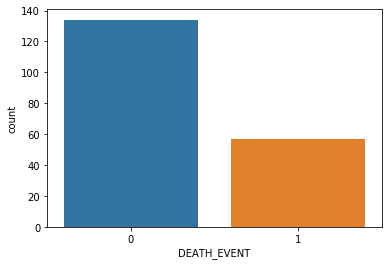

In [18]:
# Diagramma del numero delle persone che hanno avuto o meno
# un arresto cardiaco (DEATH_EVENT) durante il periodo
# di osservazione:
sns.countplot(train_data['DEATH_EVENT'])

Ora invece mettiamo in relazione le features del dataset con la quantità di persone che sono state sotto osservazione.

In [19]:
cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
       'smoking', 'time']

In [20]:
# Alcune stampe che mettono in relazione le features
# del dataset con le persone che si sono sottoposte al
# periodo di osservazione

for col in cols:
    print(train_data.groupby([col, 'DEATH_EVENT']).size())

age     DEATH_EVENT
40.000  0               5
42.000  0               3
44.000  0               2
45.000  0               8
        1               1
46.000  0               1
        1               1
48.000  1               1
49.000  0               2
        1               1
50.000  0              13
        1               6
51.000  0               2
52.000  0               4
53.000  0               6
        1               1
54.000  1               1
55.000  0              11
        1               1
57.000  0               1
58.000  0               5
        1               1
59.000  0               1
        1               1
60.000  0              10
        1               6
60.667  0               1
61.000  0               4
62.000  0               4
        1               1
63.000  0               6
64.000  0               1
65.000  0              10
        1               6
66.000  0               1
67.000  0               2
68.000  0               3
        1         

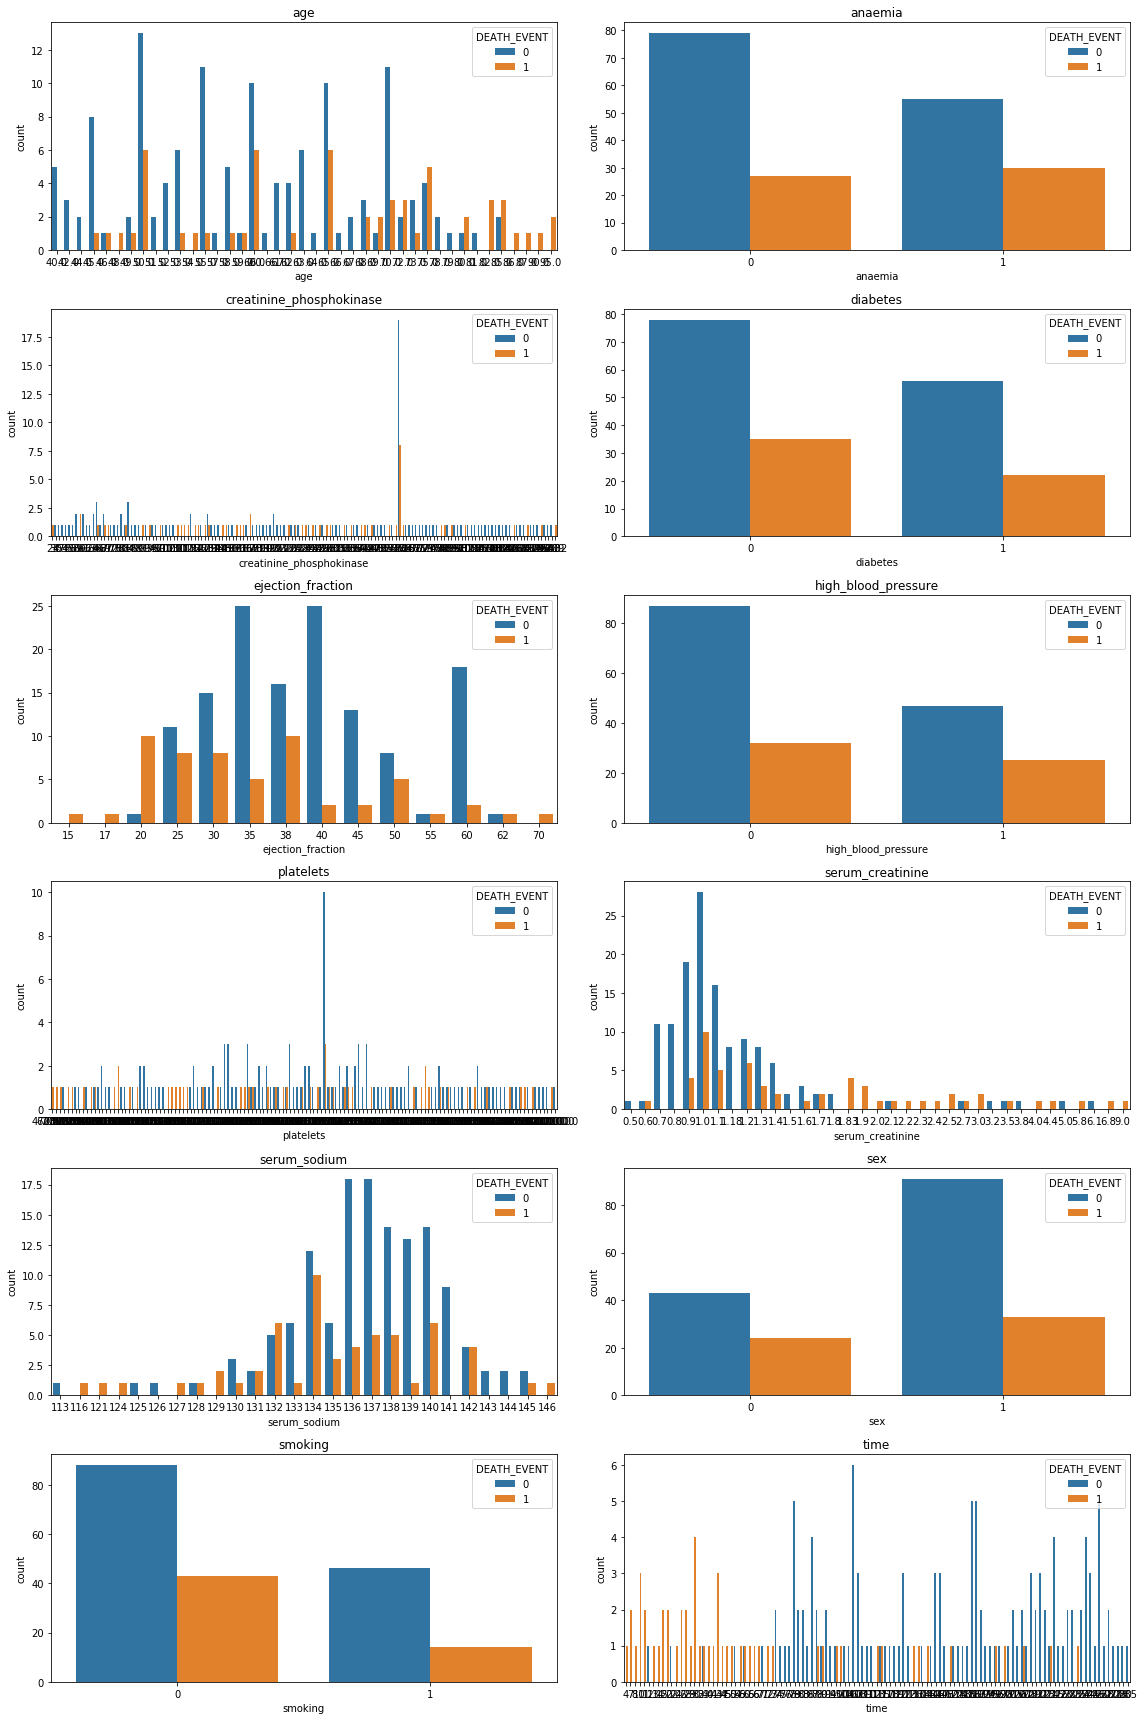

In [21]:
# Alcuni grafici che mettono in relazione le features
# del dataset con le persone che si sono sottoposte al
# periodo di osservazione

cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex',
       'smoking', 'time']

n_rows = 6
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*4))
i=0
for r in range(n_rows):
    for c in range(n_cols):
        ax = axs[r][c]
        sns.countplot(train_data[cols[i]], hue=train_data['DEATH_EVENT'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='DEATH_EVENT', loc='upper right')
        i+=1
    
plt.tight_layout()

Attraverso i dati e i grafici appena mostrati è possibile fare le seguenti osservazioni:
- age: all'aumentare dell'età aumenta la probabilità di avere un arresto cardiaco;
- anaemia: i possessori di anemia hanno una maggiore possibilità di avere un attacco cardiaco, infatti risulta che circa il 35% dei pazienti con anemia hanno avuto un arresto cardiaco contro il 25% dei pazienti che non hanno anemia;
- creatinine_phosphokinase: questo valore è ininfluente in quanto è importante considerare un intervallo e non un singolo valore. Ciò che può essere utile ai fini statistici è la considerazione dei valori alti che possono indicare la probabilità di un recente infarto (fonte: https://www.my-personaltrainer.it/fisiologia/creatinchinasi.html#116067);
- diabetes: avere il diabete non comporta necessariamente un arresto cardiaco, infatti i dati che abbiamo a disposizione mostrano che solo circa il 28% dei pazienti osservati con il diabete hanno avuto un arresto cardiaco contro il 30% dei pazienti senza diabete;
- ejection_fraction: i valori in percentuale di frazione di eiezione sono un dato utile per poter predirre la possibilità di avere un infarto; i valori normali per una persona sono compresi tra il 50% e il 65% (anche se il limite inferiore è molto vario), sotto questi valori si può manifestare uno scompenso cardiaco, in particolare tale diagnosi si può dividere in due gruppi (fonti: https://it.wikipedia.org/wiki/Frazione_di_eiezione e https://www.my-personaltrainer.it/salute-benessere/insufficienza-cardiaca-trattamento.html):
    - compreso tra il 40 e il 49% dove lo scompenso è moderatamente ridotto
    - inferiore al 40% dove le probabilità di avere un infarto diventano altissime
- high_blood_pressure: il numero di arresti cardiaci in pazienti con pressione alta è maggiore rispetto agli altri, infatti si parla di una percentuale di 34% contro il 26%;
- platelets: il valore normale di piastrine nel corpo si aggira tra le 150.000 e le 450.000 unità per microlitro di sangue; valori molto alti possono provocare trombosi (con la possibile conseguenza di arresto cardiaco) mentre un valore molto basso può provocare la morte per emorragia;
- serum_creatinine: il valore della creatinina si usa per monitorare il corretto funzionamento di filtraggio dei reni; i valori normali variano tra un minimo di 0,6 e un massimo di 1,3 mg/dl; nel grafico si nota come all'aumentare di questo valore la maggior parte dei pazienti ha avuto un arresto cardiaco;
- serum_sodium: livelli alti di sodio nel sangue possono portare a Ipernatriemia che in situazioni gravi può portare a confusione, spasmi muscolari, convulsioni, coma e morte. Al contrario, un basso livello di sodio ha molte cause, compresi l’insufficienza renale, l’insufficienza cardiaca;
- sex: dai risultati si osserva che circa il 35% dei pazienti di sesso 0 e circa il 26% dei pazienti di sesso 1 hanno avuto un arresto cardiaco;
- smoking: dai risultati si osserva che circa il 32% dei pazienti di che non fumano e circa il 23% dei pazienti che fumano hanno avuto un arresto cardiaco;
- time: guardando il grafico si può osservare come all'aumentare del tempo di osservazione diminuiscono i casi di morte per arresto cardiaco.

Un'osservazione particolare deve essere fatta sui due picchi nei grafici delle features *creatinine_phosphokinase* e della *platelets* che, su un numero di dati così ridotto, non risultano avere una valenza significativa. Per poter dare importanza a questi due picchi sarebbe necessario confrontarli con un dataset con un numero di campioni maggiore.

## Aggiustamenti vari sul dataset

Una correzione da dover fare al dataset è quello di trasformare la colonna age da float a int, in quanto non ha senso avere un'età con la virgola.

In [22]:
train_data['age'] = train_data['age'].astype('int64')
test_data['age'] = test_data['age'].astype('int64')

In [23]:
train_data.dtypes

DEATH_EVENT                   int64
age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
dtype: object

In [24]:
train_data.head(15)

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0,58,1,400,0,40,0,164000.00,1.00,139,0,0,91
1,0,40,0,582,1,35,0,222000.00,1.00,132,1,0,244
2,1,72,1,328,0,30,1,621000.00,1.70,138,0,1,88
3,0,60,1,1082,1,45,0,250000.00,6.10,131,1,0,107
4,0,40,1,101,0,40,0,226000.00,0.80,141,0,0,187
5,0,50,0,2522,0,30,1,404000.00,0.50,139,0,0,214
6,1,50,0,124,1,30,1,153000.00,1.20,136,0,1,32
7,0,75,0,675,1,60,0,265000.00,1.40,125,0,0,205
8,0,42,1,86,0,35,0,365000.00,1.10,139,1,1,201
9,1,69,0,582,0,20,0,266000.00,1.20,134,1,1,73


## Modello

Adesso si andrà a creare il modello-classificatore che sraà successivamente ad addestrato.

### Dichiarazione del modello

Il classificatore che è stato utilizzato prende il nome di *RandomForestClassifier*. Questo algoritmo addestra un certo numero di alberi classificatori su delle piccole porzioni del dataset e ne calcola una media dei risultati per migliorare l'accuracy di predizione dei dati che seguiranno.

In [25]:
model = RandomForestClassifier()

In [26]:
print(model)

RandomForestClassifier()


## Train e Test

### Divisione Xy

Ora iniziamo a prepararci per l'addestramento del modello. Per prima cosa, dopo aver deciso le features su cui addestrare la rete, procediamo con la divisione del dataset in due parti: y che contiene solo la colonna delle label e X che conterrà tutto il resto.

In [27]:
# Scegliamo la colonna su cui si desidera addestrare il modello, ovvero
# la nostra 'label'
label = 'DEATH_EVENT'

# Scegliamo le colonne su cui NON voglimo addestrare il modello
not_features = ['diabetes', 'creatinine_phosphokinase', 'platelets']
# not_features = []

In [28]:
# Dividiamo il train-set e il test-set in due parti così da poter addestrare il modello:
# y che contiene solo la colonna label 'DEATH_EVENT' che consiste nella soluzione al problema
# X che contiene tutte le altre colonne droppando dal dataset
# quelle specificate in 'not_features'.
y_train = train_data.pop(label)
X_train = train_data.drop(not_features, axis=1)

y_test = test_data.pop(label)
X_test = test_data.drop(not_features, axis=1)

### Addestramento - Train

Ora è arrivato il momento di addestrare il modello.

In [29]:
# Addestramento del modello
model = model.fit(X_train, y_train)

# Calcolo dello score di addestramento del modello
score = model.score(X_train, y_train)

print(f"Training score: {score:.4%}")

Training score: 100.0000%


### Valutazione - Test

Ora eseguiamo la valutazione del modello tramite la predizione dei valori di test.

In [30]:
# Predizione dei dati di test
prediction = model.predict(X_test)

# Calcolo dell'accuracy
acc = accuracy_score(y_test, prediction)

print(f"Prediction Accuracy: {acc:.4%}")

Prediction Accuracy: 83.3333%


## Confusion Matrix

Stampiamo ora una confusion matrix con i valori trovati durante l'operazione di test.

In [31]:
# Creazione di una confusion matrix
conf_matr = confusion_matrix(y_test, prediction, normalize=None)

In [32]:
# Stampa della confusion matrix
print(conf_matr)

[[30  4]
 [ 4 10]]


[[30  4]
 [ 4 10]]


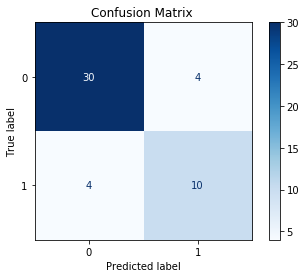

In [33]:
# Stampa grafica della confusion matrix
disp = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix ")



print(disp.confusion_matrix)
plt.show()

## Conclusioni

Con il dataset fornito non è possibile addestrare un modello in modo tale da predirre in maniera corretta qualsiasi input.

A causa del numero limitato di esempi per l'addestramento il modello non è in grado di creare un albero decisionele ottimo ma, al contrario, si genera un eccessivo overfitting del modello ai dati di train producendo un 100% di accuracy sull'operazione di train e solo un ~80% su quella di test.

Inoltre, essendo il rapporto NO_DEATH_EVENT/DEATH_EVENT nel dataset pari a ~70:30 il modello ha avuto troppi pochi esempi per poter realmente imparare a riconoscere quei input con label "DEATH_EVENT" pari a 1.

infine bisogna porre l'attenzione su un ultimo particolare, ovvero i due picchi che si possono osservare nei grafici (sezione "Analisi del dataset di train") delle features *creatinine_phosphokinase* e *platelets*. Poiché questi risultati si ottengono da un dataset di soli 240 elementi, per poter dare una valenza significativa a questi valori anomali bisognerebbe confrontarli con un altro dataset più ampio. L'utilizzo di queste due feature nella fase di addestramento potrebbe influire significativamente in modo negativo nel caso in cui, confrontandole con altri dataset, non rispecchiassero il vero.